# Extracting Vega Lite Transformations

In this notebook, we use extract out the [transformations](https://vega.github.io/vega-lite/docs/transform.html) in the Vega Lite spec generated by Altair and push them to the server, by adding them to the SQL query with Ibis.

In [1]:
import altair as alt
import ibis
import jupyterlab_omnisci
import ipywidgets
import IPython.display

import sys

sys.stdout = open('/dev/stdout', 'w')

## Carrier names

First we connect to the table using Ibis:

In [2]:
conn = ibis.heavyai.connect(
    host='localhost', user='admin', password='HyperInteractive',
    database='heavyai', protocol= 'https'
)

t = conn.table('flights_donotmodify')

Then we compose an Altair chart using an ibis expression.

In [3]:
c = alt.Chart(t[t.carrier_name]).mark_bar().encode(
    x='carrier_name',
    y='count()'
)

Finally, we enable rendering that extracts the aggregate expressions and adds them onto the Ibis expresion:

/home/ian/anaconda3/envs/omnisci/lib/python3.7/site-packages/altair/utils/core.py:90: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  "Defaulting to nominal.".format(typ))


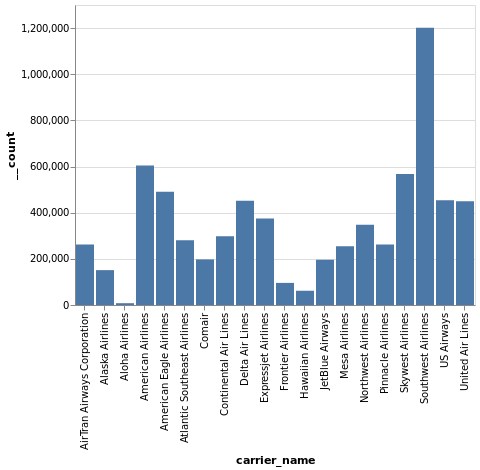

In [4]:
alt.data_transformers.enable('ibis')
alt.renderers.enable('ibis')

c

The only data loaded into the browser for this chart is one row for each carrier, because the counting transformation is pushed to the SQL statement.

## VDOM support: grouping by month
Now let's use VDOM to facet this by month:

In [5]:
from vdom import div, input_
from debounce import debounce

month = 1

@debounce(0.3)
def handle_change(event):
    global month
    month = int(event['value'])
    slider_handle.update(render_slider(month))
#     chart_handle.update(render_chart(month))
    jupyterlab_omnisci.get_display(render_chart, month, display_handle=chart_handle)
    
def render_slider(month):
    return input_(
        type='range',
        min=1,
        max=12,
        step=1,
        defaultValue=month,
        onChange=handle_change
    )

def render_chart(month):
    return alt.Chart(t[t.flight_dayofmonth, t.depdelay, t.flight_month][t.flight_month == month]).mark_line().encode(
        x='flight_dayofmonth:O',
        y='average(depdelay)'
    )

slider_handle = display(render_slider(month), display_id=True)
chart_handle = jupyterlab_omnisci.get_display(render_chart, month)

<input type="range"></input>

<input type="range"></input>

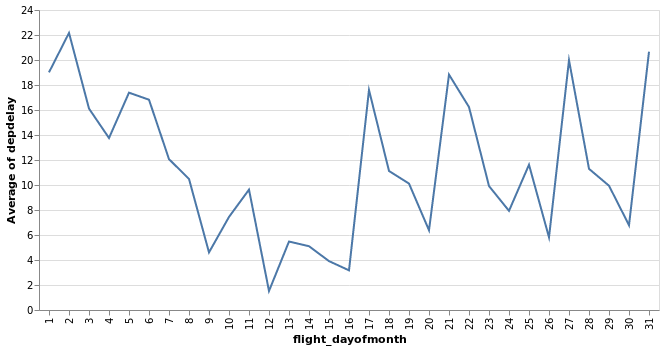

In [6]:
from vdom import div, input_
from debounce import debounce

month2 = 1

@debounce(0.3)
def handle_change2(event):
    global month2
    month2 = int(event['value'])
    slider_handle2.update(render_slider2(month2))
#     chart_handle.update(render_chart(month))
    jupyterlab_omnisci.get_display(render_chart2, month2, display_handle=chart_handle2)
    
def render_slider2(month):
    return input_(
        type='range',
        min=1,
        max=12,
        step=1,
        defaultValue=month,
        onChange=handle_change2
    )

def render_chart2(month):
    return alt.Chart(t[t.flight_dayofmonth, t.depdelay, t.flight_month][t.flight_month == month]).mark_line().encode(
        x='flight_dayofmonth:O',
        y='average(depdelay)'
    )

slider_handle2 = display(render_slider2(month2), display_id=True)
chart_handle2 = jupyterlab_omnisci.get_display(render_chart2, month2)